In [1]:
import sys
sys.path.append('../')

import os
import typing as tp

import matplotlib.pyplot as plt
import numpy as np
import torch

from src.data.utils import read_image
from src.data.convolution import convolve_tensors
from src.deconv.neural.usrnet.utils import utils_image as util
from src.deconv.neural.usrnet.predictor import USRNetPredictor

In [2]:
kernels = np.array(np.load(os.path.join('/home/chaganovaob/edu/deconvolution-benchmark/data/psf/psf', 'big_psf.npy'), allow_pickle=True))

device = 'cpu'
model = USRNetPredictor(
    model_path='../models/usrnet.pth',
    scale_factor = 1,
    noise_level_model  = 0,
    device = 'cpu',
)

In [3]:
kernel = kernels[3]['psf'].astype(np.float64)

img_path = '/home/chaganovaob/edu/deconvolution-benchmark/data/images/faces/avatar-025e9e3ce6187144eff05c735e35bf3a.jpg'
image = read_image(img_path)  # HR image, int8

blurred_image = convolve_tensors(image, kernel).cpu()
x = model.forward(blurred_image, kernel)

print('Got result!')

Got result!


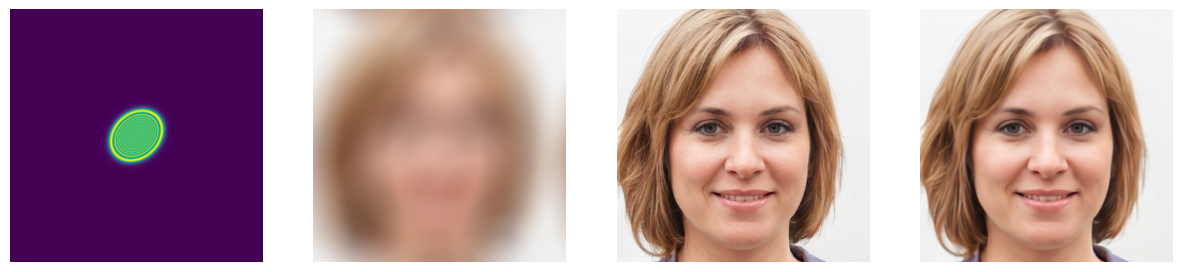

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for ax in axs:
    ax.axis('off')
axs[0].imshow(kernel)
axs[1].imshow(blurred_image.cpu())
axs[2].imshow(image)

axs[3].imshow(np.transpose(x[0], (1, 2, 0)))